In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_labels.shape

(10000,)

In [8]:
num_samples = int(0.2 * len(train_images))
random_indices = np.random.choice(len(train_images), num_samples, replace=False)

reduced_train_images = train_images[random_indices]
reduced_train_labels = train_labels[random_indices]

In [9]:
label_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


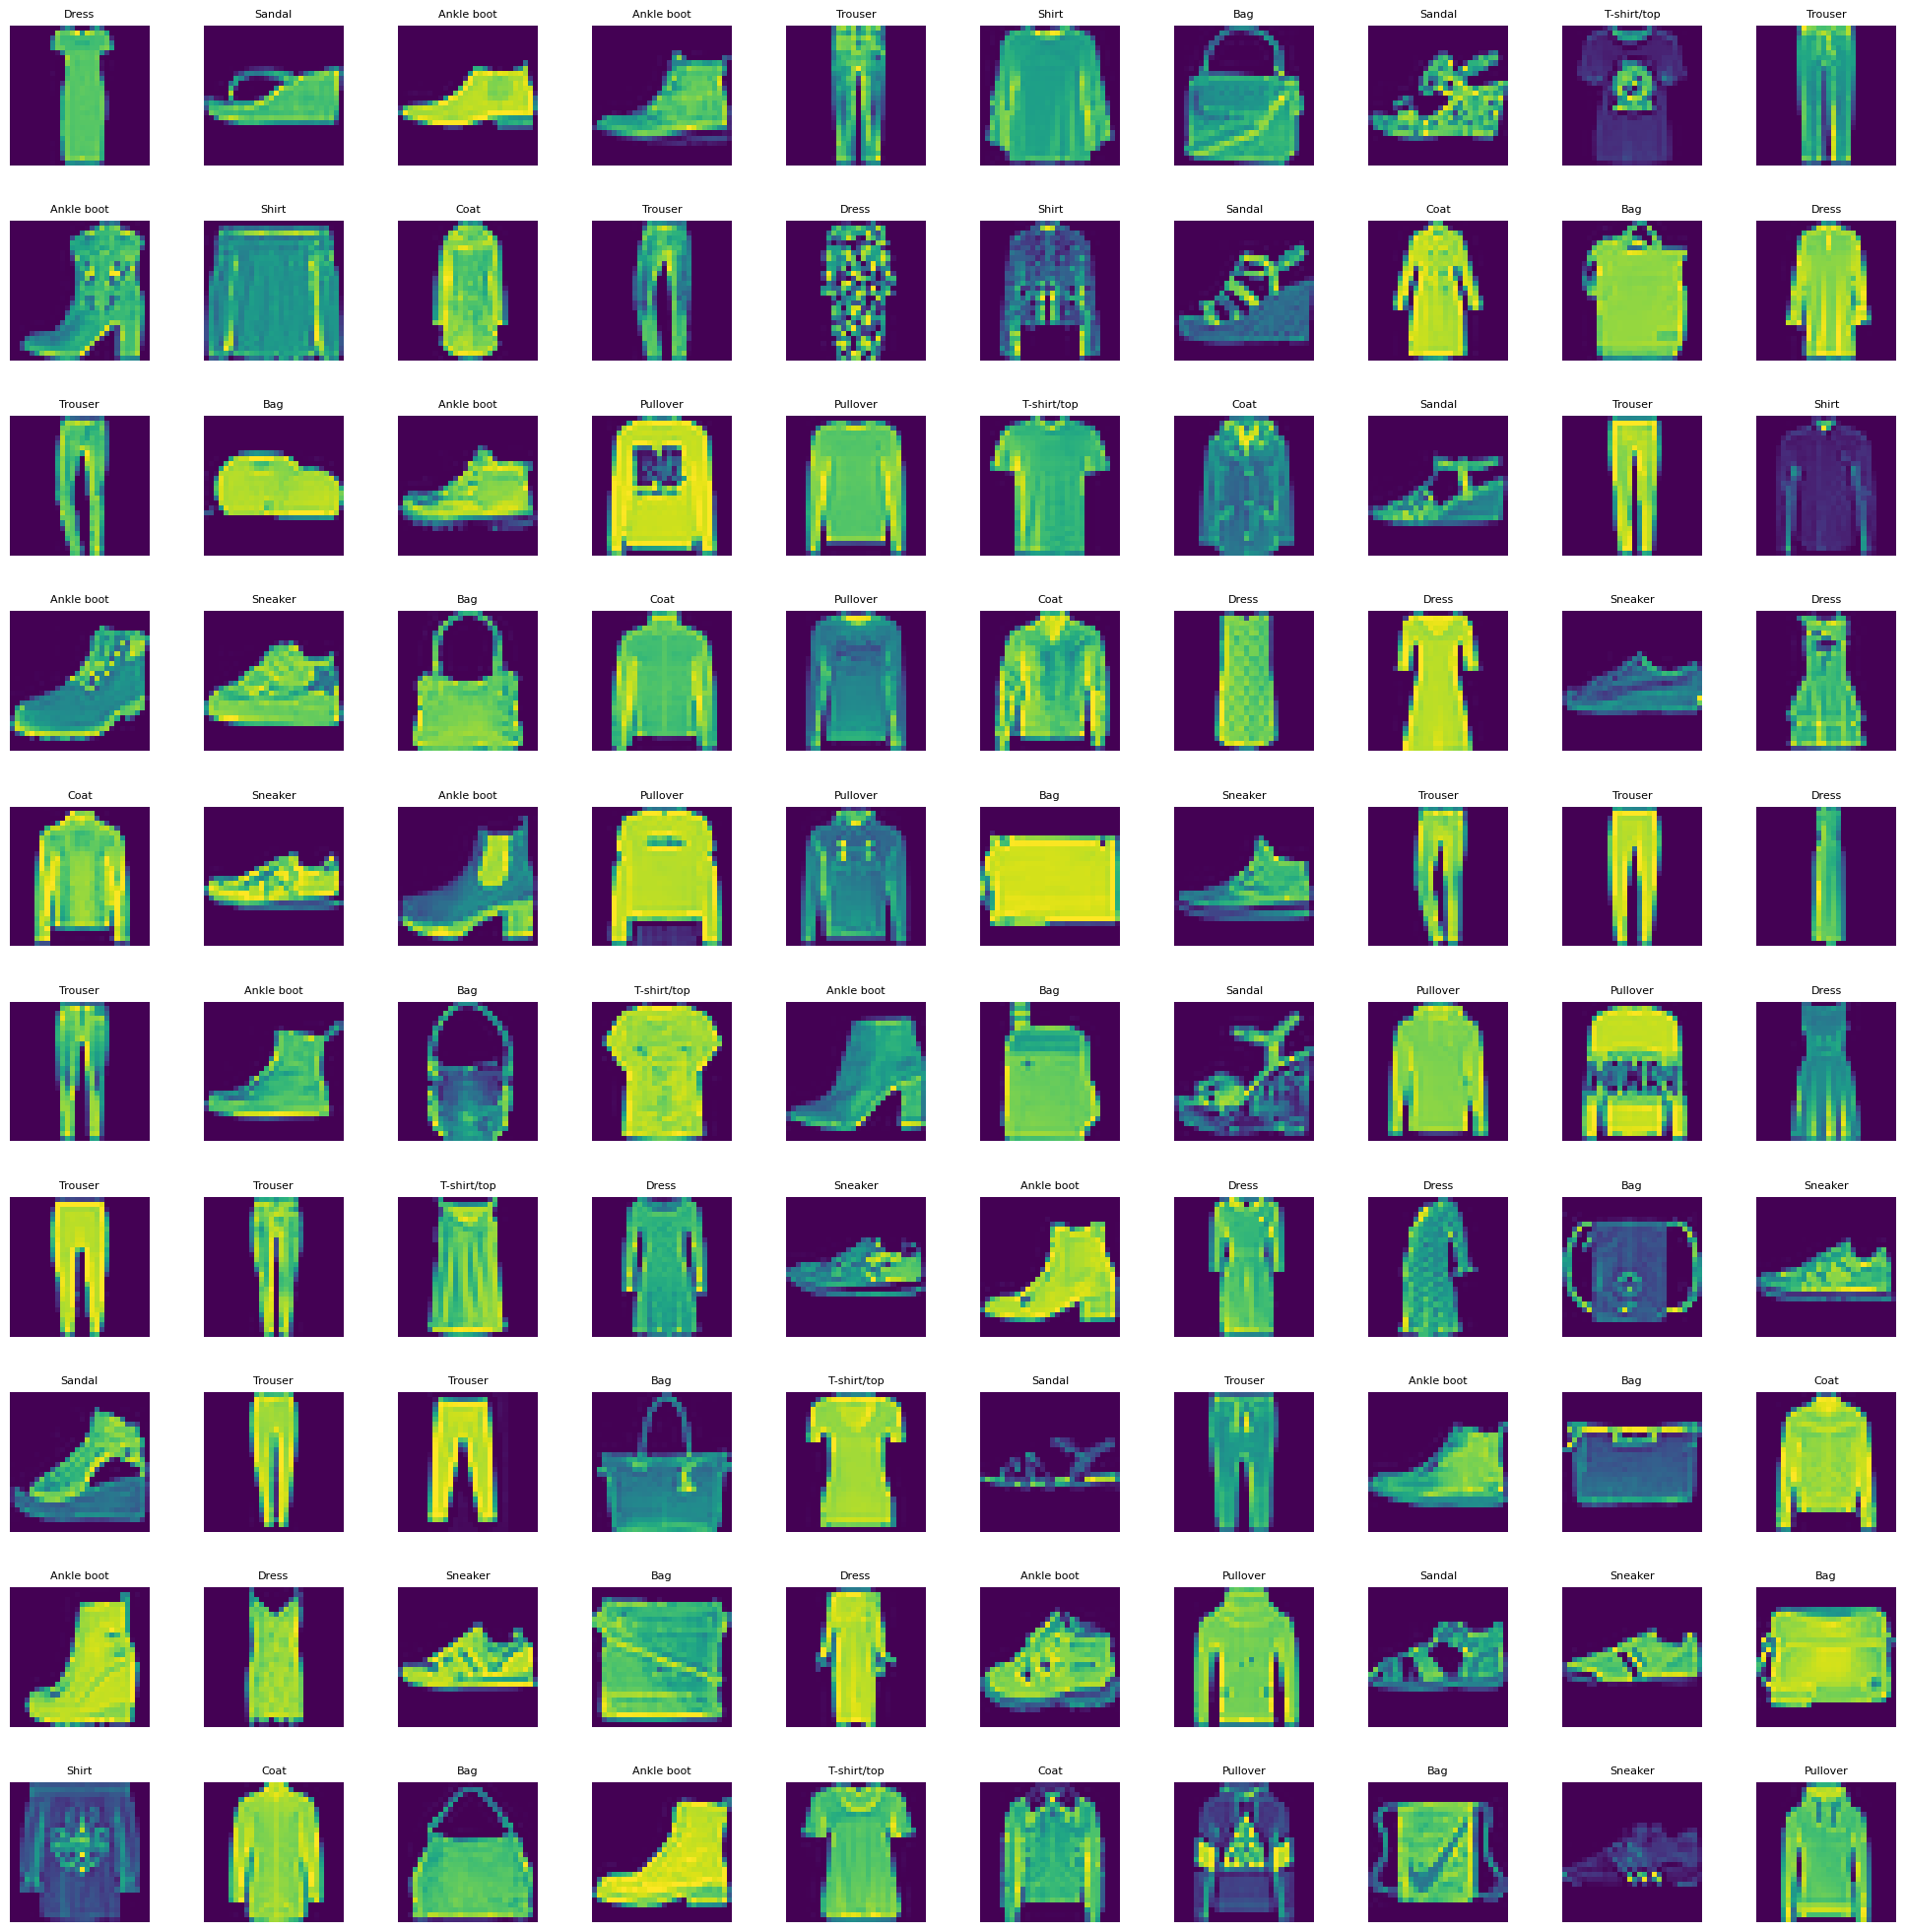

In [10]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel()

n_training = len(train_images)

for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(train_images[index])
    axes[i].set_title(label_names[train_labels[index]], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [11]:
unique_labels = np.unique(train_labels)

unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
num_distinct_labels = unique_labels.size

print(f"Number of distinct labels: {num_distinct_labels}")

Number of distinct labels: 10


In [13]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_distinct_labels)

train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [17]:
test_labels = tf.keras.utils.to_categorical(test_labels, num_distinct_labels)

test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [19]:
train_images.shape

(60000, 28, 28)

In [20]:
input_features_shape = train_images.shape[1:] + (1,)

input_features_shape

(28, 28, 1)

In [21]:
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

tf.random.set_seed(42)

In [22]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_features_shape))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

cnn_model.add(MaxPooling2D(2,2))

cnn_model.add(Dropout(0.4))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

cnn_model.add(MaxPooling2D(2,2))

cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=1024, activation='relu'))

cnn_model.add(Dense(units=1024, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))

In [24]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics= ['accuracy'])

In [25]:
history = cnn_model.fit(
    train_images,
    train_labels,
    batch_size=32,
    epochs=5,
    shuffle=True
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 470s 249ms/step - accuracy: 0.7137 - loss: 0.7548
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 469s 250ms/step - accuracy: 0.8718 - loss: 0.3504
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 498s 248ms/step - accuracy: 0.8847 - loss: 0.3186
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 462s 246ms/step - accuracy: 0.8887 - loss: 0.3110
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 461s 246ms/step - accuracy: 0.8934 - loss: 0.3009


In [26]:
evaluation = cnn_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step - accuracy: 0.8855 - loss: 0.3316


In [27]:
print("Test Accuracy: {}".format(evaluation[1]))

Test Accuracy: 0.8804000020027161


In [28]:
probabilities = cnn_model.predict(test_images)

predicted_classes = np.argmax(probabilities, axis=1)

predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step


array([9, 2, 1, ..., 8, 1, 7])

In [29]:
test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
test_labels = test_labels.argmax(axis=1)

test_labels

array([9, 2, 1, ..., 8, 1, 5])

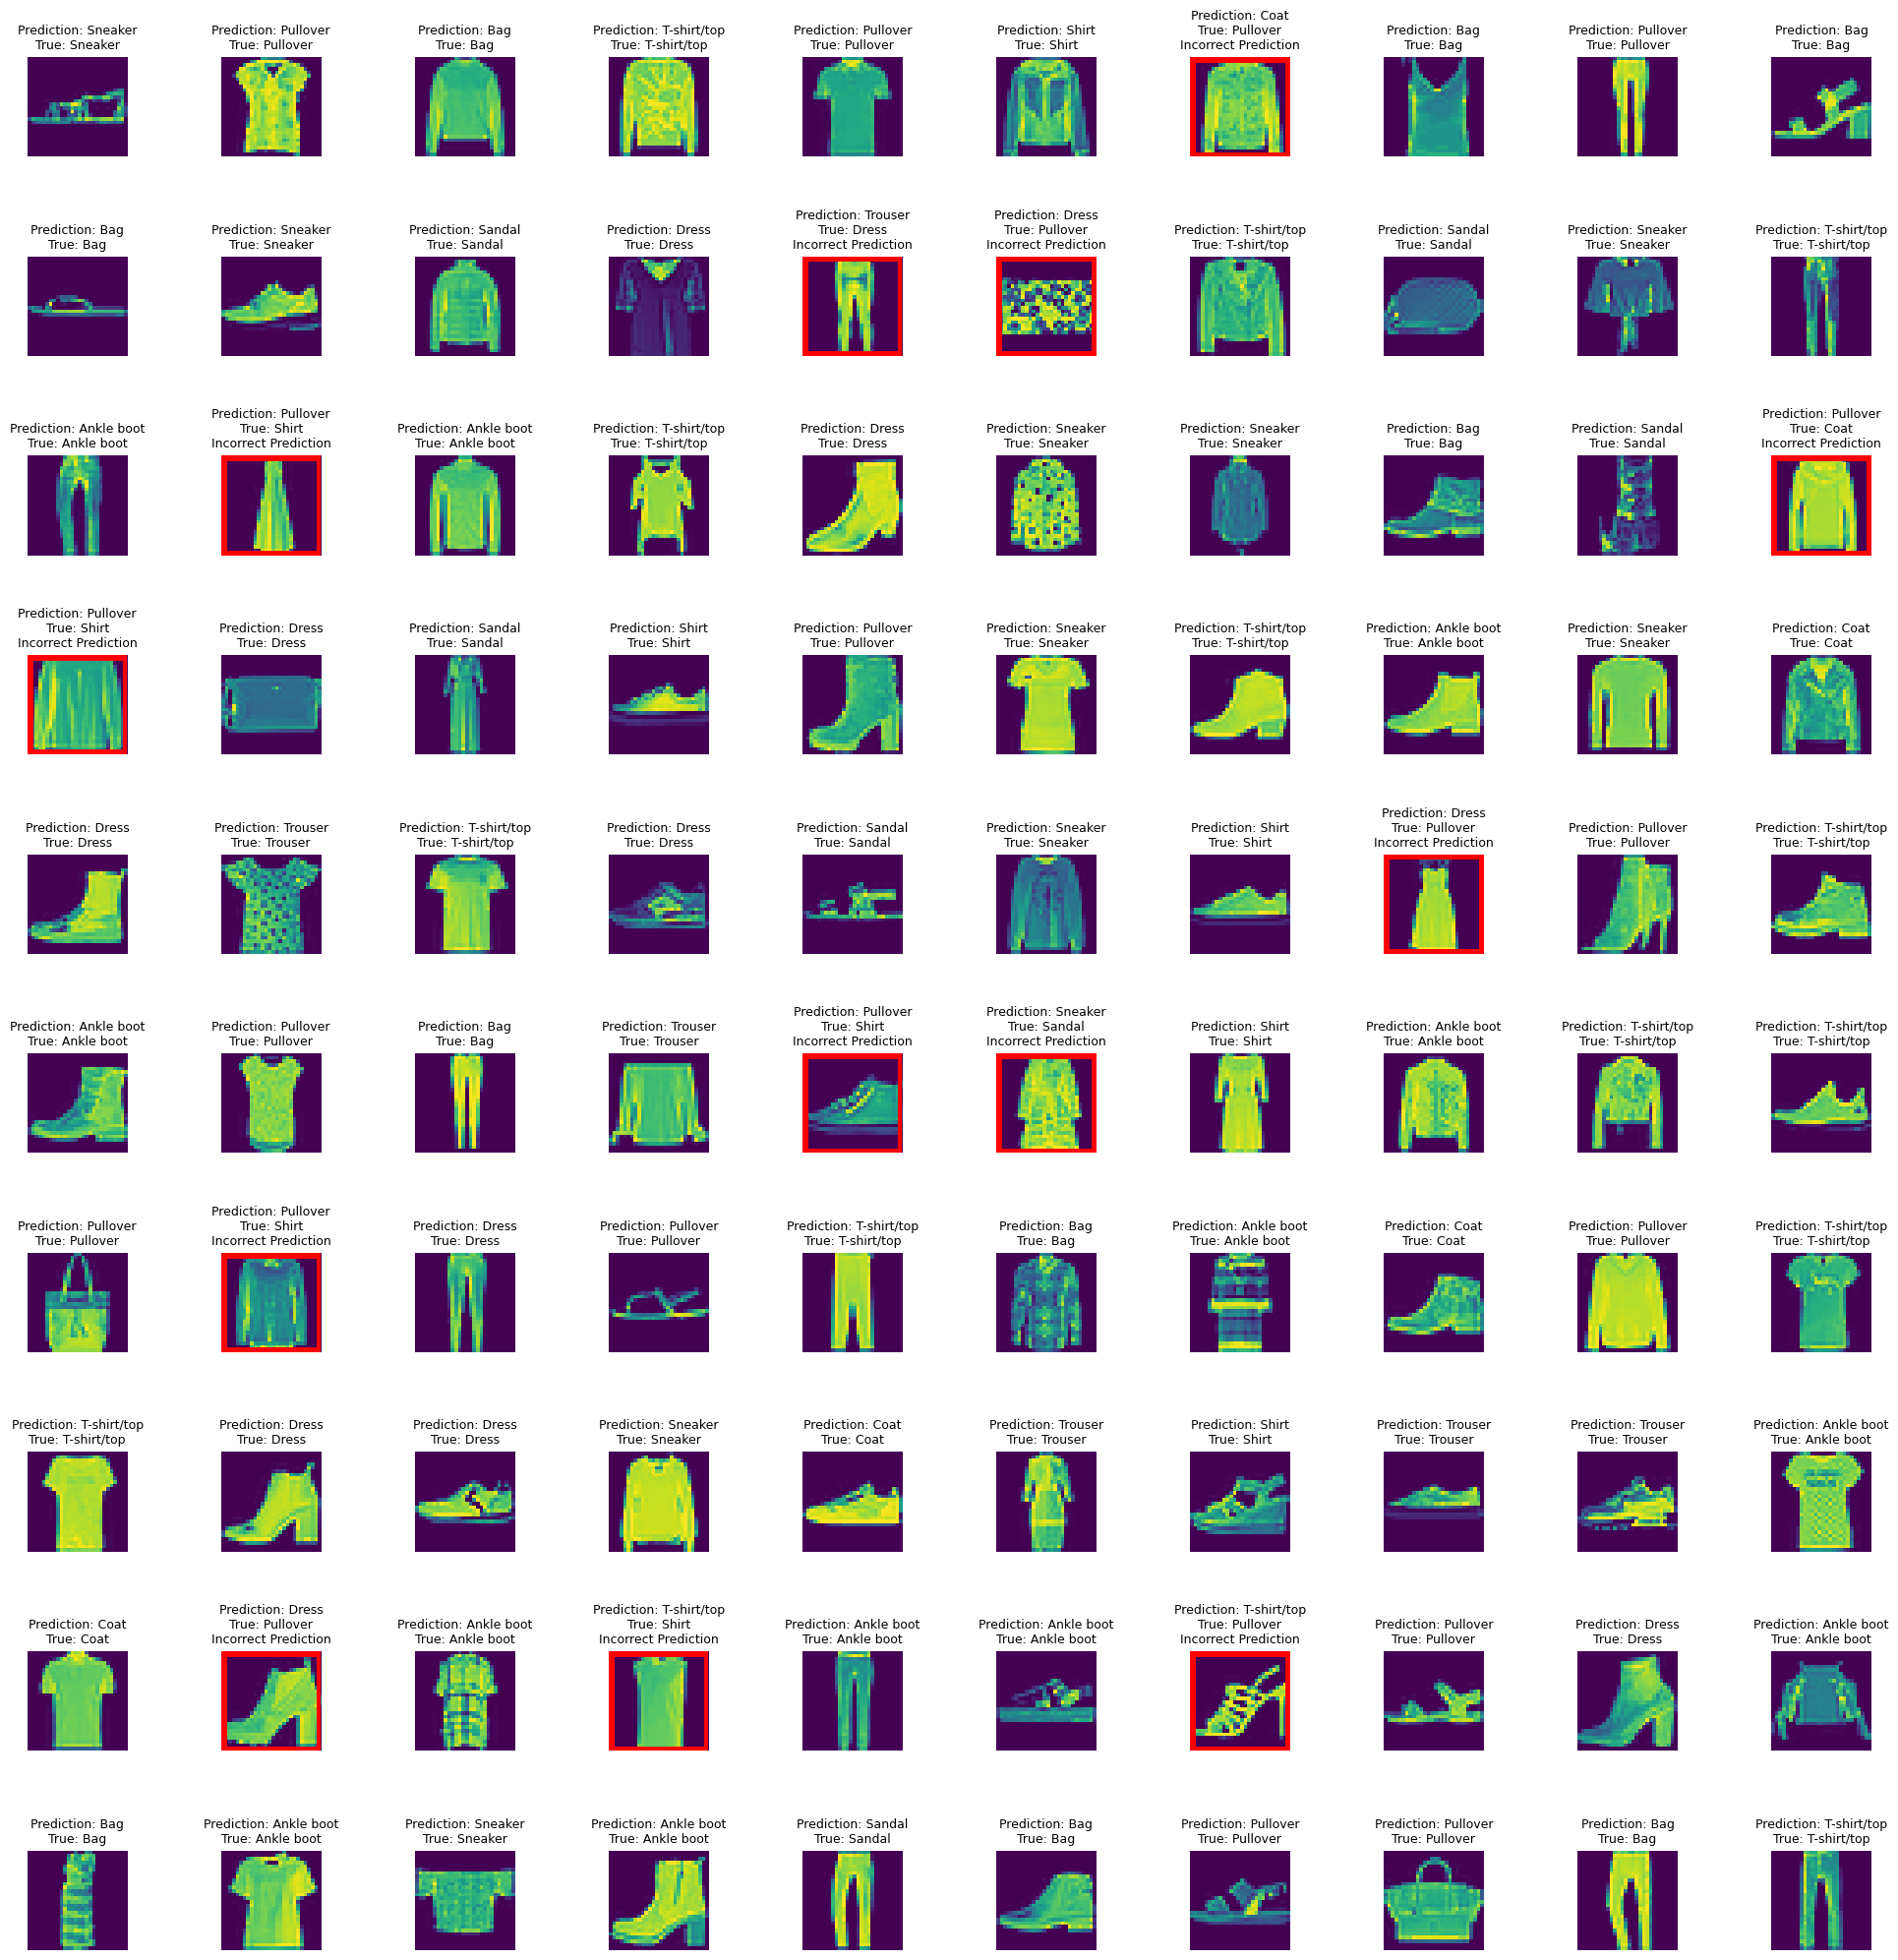

In [31]:
import matplotlib.patches as patches
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel()

n_testing = len(test_images)

for i in np.arange(0,L_grid*W_grid):
    index = np.random.randint(0, n_testing)
    axes[i].imshow(train_images[index])

    title = f"Prediction: {label_names[predicted_classes[index]]}\nTrue: {label_names[test_labels[index]]}"

    if predicted_classes[index] != test_labels[index]:
        title += "\nIncorrect Prediction"

        rect = patches.Rectangle((0,0), 27, 27, linewidth=5, edgecolor='red', facecolor='none')
        axes[i].add_patch(rect)

    axes[i].set_title(title, fontsize=9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=1)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

overall_accuracy = accuracy_score(test_labels, predicted_classes)
print(f'Overall Accuracy: {overall_accuracy:.2f}')

overall_precision = precision_score(test_labels, predicted_classes, average='weighted')
print(f'Overall Precision: {overall_precision:.2f}')

overall_recall = recall_score(test_labels, predicted_classes, average='weighted')
print(f'Overall Recall: {overall_recall:.2f}')

overall_f1 = f1_score(test_labels, predicted_classes, average='weighted')
print(f'Overall F1-score: {overall_f1:.2f}')

Overall Accuracy: 0.88
Overall Precision: 0.89
Overall Recall: 0.88
Overall F1-score: 0.88


<Axes: >

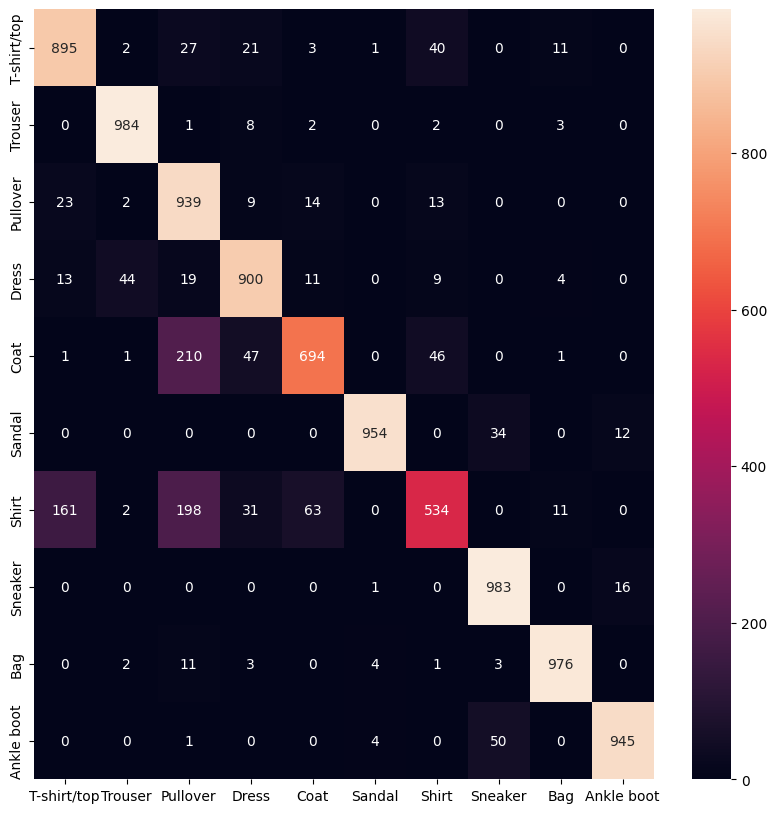

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predicted_classes)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, xticklabels=label_names.values(), yticklabels=label_names.values(), fmt='d')

In [34]:
from sklearn.metrics import classification_report

cr = classification_report(test_labels, predicted_classes, target_names=list(label_names.values()))

print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.90      0.86      1000
     Trouser       0.95      0.98      0.97      1000
    Pullover       0.67      0.94      0.78      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.88      0.69      0.78      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.83      0.53      0.65      1000
     Sneaker       0.92      0.98      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.97      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [35]:
import os

directory = os.path.join(os.getcwd(), 'saved_trained_models')

if not os.path.isdir(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'keras_fashionMNSIT_trained_model.h5')

cnn_model.save(model_path)